In [2]:
import numpy as np

import matplotlib.pyplot as plt

import healpy as hp

import pathlib

import os

#retina matplotlib magic



In [4]:
import sys
sys.path.append('../itfgs/')

version = 'bornVGiulio'
get_temp = lambda x: x.TEMP

version = 'born'
#get_temp = lambda x: "/pscratch/sd/o/omard/n32/S4GiulioBorn/lenscarfrecs"

from itfgs.params import S4n32 as SOB
from itfgs.params import S4n32Gauss as SOBg
from itfgs.params import S4n32Rand as SOBr
#from itfgs.params import S4n32PostBorn as SOPB
#from itfgs.params import S4n32PostBornRand as SOPBr




## CMB level plots

In [5]:
Simulationsdir = pathlib.Path(os.environ['SCRATCH'])/'SKYSIMS/GIULIOSIMS/'

In [6]:
keyB = 'NL Born'
keyBg = 'NL Born Gauss'
keyBr = 'NL Born Rand'
keyPB = 'NL Post-Born'
keyPBr = 'NL Post-Born Rand'


In [7]:
#SOdict = {keyB: SOB, keyPB: SOPB, keyBr: SOBr, keyPBr: SOPBr, keyBg: SOBg}
SOdict = {keyB: SOB, keyBr: SOBr, keyBg: SOBg}

In [8]:
tlm_maps = {k: SO_.sims_cmb_len.get_sim_tlm(0) for k, SO_ in SOdict.items()}

In [9]:
cls_len = SOB.cls_len
cls_unl = SOB.cls_unl
cls_grad = SOB.cls_grad
tt = cls_len['tt']
pp = cls_unl['pp']

In [10]:
class Config(object):
    def __init__(self, cls_unl, cls_len, cls_weight, nlev_t = 7., beam = 1.7, lmax_qlm = 4000, lminrec = 10, lmaxrec = 4000):

        self.nlev_t = nlev_t
        self.nlev_p = np.sqrt(2)*self.nlev_t
        self.beam = beam

        self.lmin_tlm = lminrec
        self.lmax_ivf = lmaxrec

        self.lmax_qlm = lmax_qlm

        self.cls_unl = cls_unl
        self.cls_len = cls_len
        self.cls_weight = cls_weight


SO = Config(cls_unl, cls_len, cls_grad, nlev_t = 1., beam = 1.)
qe_key = 'ptt'
nlev_t = SO.nlev_t
nlev_p = SO.nlev_p
beam_fwhm = SO.beam
cls_unl_fid = SO.cls_unl
lmin_cmb, lmax_cmb = SO.lmin_tlm, SO.lmax_ivf
lmax_qlm = SO.lmax_qlm

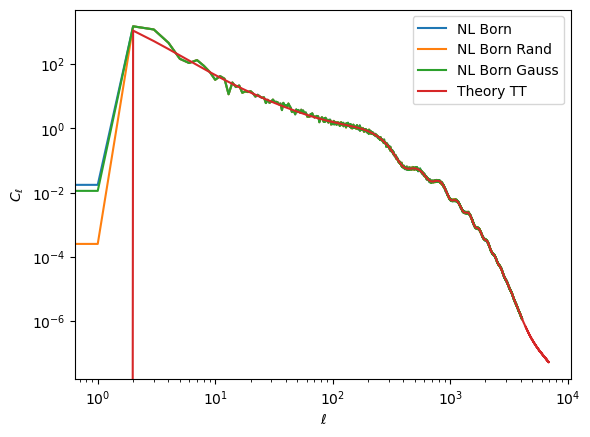

In [11]:
for k, tlm in tlm_maps.items():
    plt.loglog(hp.alm2cl(tlm), label = k)
plt.loglog(tt, label = 'Theory TT')
plt.ylabel(r'$C_\ell$')
plt.xlabel(r'$\ell$')
plt.legend()

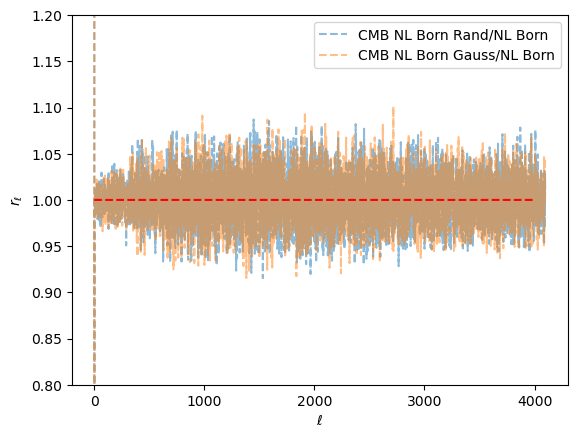

In [12]:
for key_ in [keyBr, keyBg]:
    alpha = 0.5 if key_ != keyB else 1.
    plt.plot(hp.alm2cl(tlm_maps[key_])/hp.alm2cl(tlm_maps[keyB]), label = f'CMB {key_}/{keyB}', ls = '--', alpha = alpha)


plt.plot(np.arange(0, 4000), np.ones(4000), 'r--')
plt.ylim(0.8, 1.2)
plt.ylabel(r'$r_\ell$')
plt.xlabel(r'$\ell$')
plt.legend()

## Plot QE reconstruction

In [13]:
from plancklens.qcinv.util_alm import alm_copy as palm_copy

In [14]:
input_plm_maps = {k: SO_.sims_cmb_len.get_sim_plm(0) for k, SO_ in SOdict.items()}

In [15]:
from lenscarf.iterators import statics

plms_QE_dict = {k: np.load(f'{get_temp(SO_)}/ptt_sim0000{version}/normalized_phi_plm_it000.npy') for k, SO_ in SOdict.items()}

p2k = np.arange(4001) * np.arange(1, 4002) * 0.5

In [16]:
plm_in_ins = {k: palm_copy(d, lmax = SOdict[k].lmax_phi) for k, d in input_plm_maps.items()} #GF input postborn + NL map
auto_in = {k: hp.alm2cl(plm_in) for k, plm_in in plm_in_ins.items()}

In [17]:
crosses_dict =  {k: hp.alm2cl(plms_QE_dict[k], plm_in) for k, plm_in in plm_in_ins.items()}

/tmp/ipykernel_76125/2393750205.py:6: RuntimeWarning: invalid value encountered in divide
  plt.loglog(auto_in[key_]/auto_in[keyB], label = f'Auto IN {key_}/Auto IN {keyB}', alpha = alpha, ls = ls)
/tmp/ipykernel_76125/2393750205.py:14: RuntimeWarning: divide by zero encountered in divide
  plt.loglog(auto/pp[:len(auto)], label = f'Auto IN {k}/pp th', alpha = 0.4, ls = '--')
/tmp/ipykernel_76125/2393750205.py:14: RuntimeWarning: invalid value encountered in divide
  plt.loglog(auto/pp[:len(auto)], label = f'Auto IN {k}/pp th', alpha = 0.4, ls = '--')


Text(0, 0.5, '$r_L$')

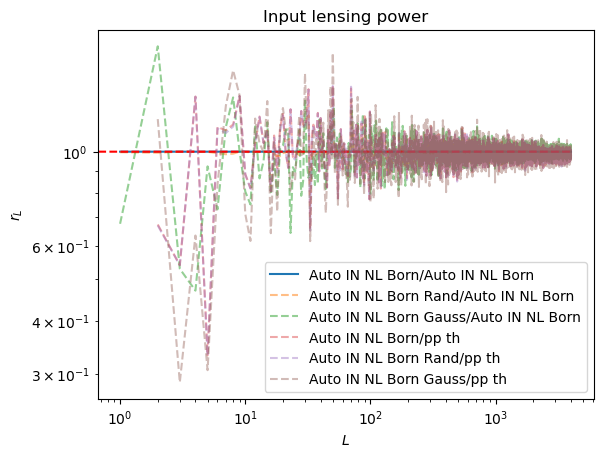

In [18]:
plt.title('Input lensing power')

for key_ in [keyB, keyBr, keyBg]:
    alpha = 0.5 if key_ != keyB else 1.
    ls = '--' if key_ != keyB else '-'
    plt.loglog(auto_in[key_]/auto_in[keyB], label = f'Auto IN {key_}/Auto IN {keyB}', alpha = alpha, ls = ls)

#plt.loglog(auto_in[keyB]/auto_in[keyPB], label = f'Auto IN {keyB}/Auto IN {keyPB}')
#plt.loglog(auto_in[keyBr]/auto_in[keyPB], label = f'Auto IN {keyBr}/Auto IN {keyPB}', ls = '--')

plt.loglog(np.arange(0, 4000), np.ones(4000), 'r--')

for k, auto in auto_in.items():
    plt.loglog(auto/pp[:len(auto)], label = f'Auto IN {k}/pp th', alpha = 0.4, ls = '--')


plt.legend()

plt.xlabel(r'$L$')
plt.ylabel(r'$r_L$')

Text(0, 0.5, '$C_L$')

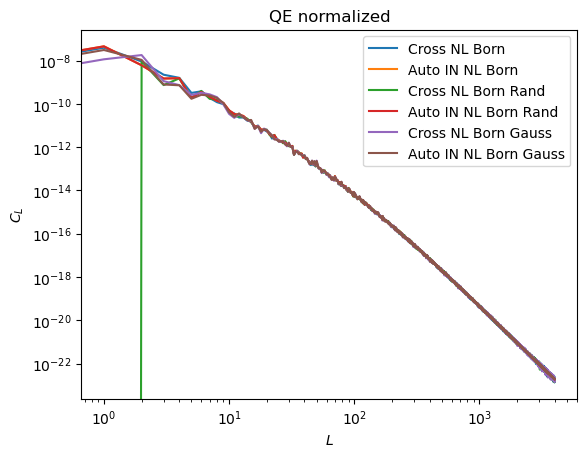

In [19]:
plt.title('QE normalized')

for k, autoin in auto_in.items():
    plt.loglog(crosses_dict[k], label = f'Cross {k}')
    plt.loglog(autoin, label = f'Auto IN {k}')

plt.legend()

plt.xlabel(r'$L$')
plt.ylabel(r'$C_L$')

In [20]:
auto =  {k: hp.alm2cl(plms, plms) for k, plms in plms_QE_dict.items()}

/tmp/ipykernel_76125/1341853639.py:3: RuntimeWarning: invalid value encountered in divide
  rho = {k: cross/np.sqrt(auto_in[k]*auto[k]) for k, cross in crosses_dict.items()}


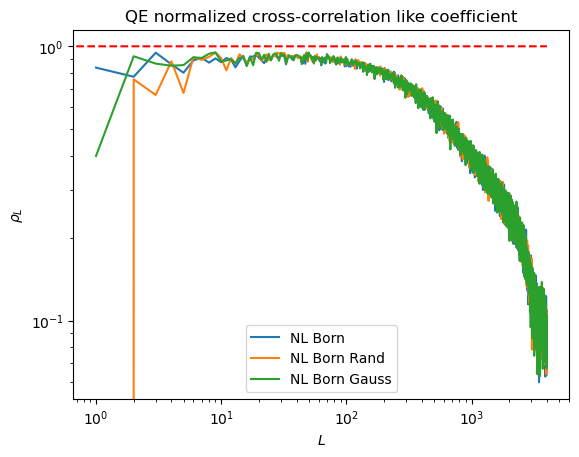

In [21]:
plt.title('QE normalized cross-correlation like coefficient')

rho = {k: cross/np.sqrt(auto_in[k]*auto[k]) for k, cross in crosses_dict.items()}


for k, rho in rho.items():
    plt.loglog(rho, label = f'{k}')

plt.loglog(np.arange(0, 4000), np.ones(4000), 'r--')

plt.xlabel(r'$L$')
plt.ylabel(r'$\rho_L$')

plt.legend()

## Iterative Reconstruction

In [22]:
from lenscarf.iterators import statics

In [23]:
iters = [0, 1]

In [24]:
plms_dict = {k: statics.rec.load_plms(f'{get_temp(SO_)}/ptt_sim0000{version}/', iters) for k, SO_ in SOdict.items()}


/tmp/ipykernel_76125/1706209759.py:15: RuntimeWarning: invalid value encountered in divide
  rhos_list = [c_/np.sqrt(a_*auto_in_temp) for c_, a_ in zip(cs_, as_)]


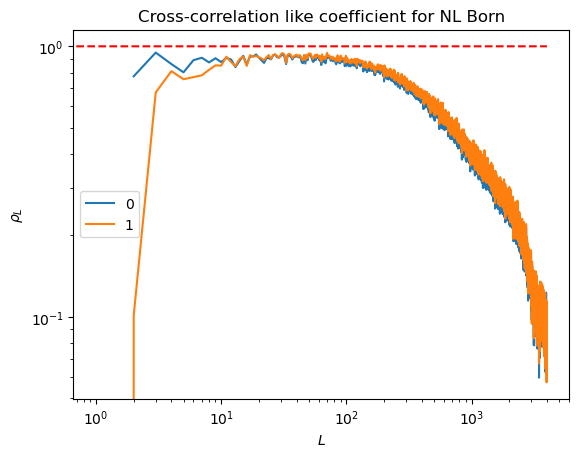

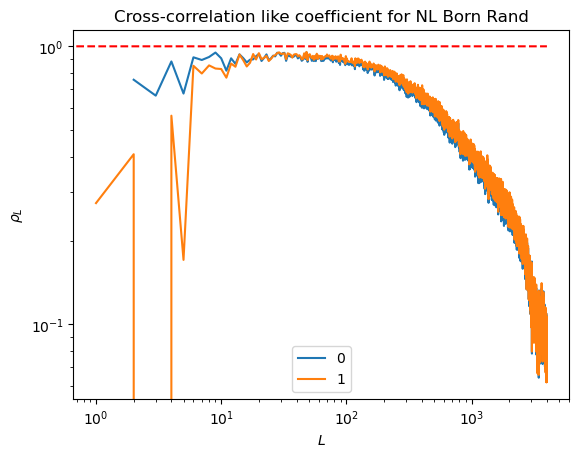

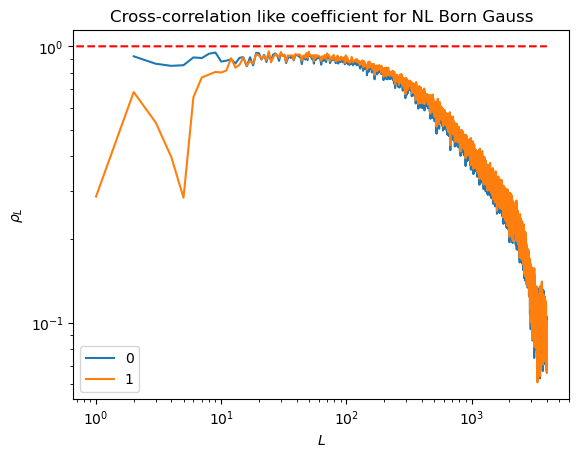

In [25]:
rho_iters_dict = {}
crosses_dict = {}
autos_dict = {}
autos_in_dict = {}

for k, plms in plms_dict.items():
    auto_in_temp = auto_in[k]
    cs_ = [hp.alm2cl(plm_, plm_in_ins[k]) for plm_ in plms]
    as_ = [hp.alm2cl(plm_) for plm_ in plms]
    
    crosses_dict[k] = cs_
    autos_dict[k] = as_
    autos_in_dict[k] = auto_in_temp

    rhos_list = [c_/np.sqrt(a_*auto_in_temp) for c_, a_ in zip(cs_, as_)]
    rho_iters_dict[k] = rhos_list

colors = []
for k, rhos in rho_iters_dict.items():
    plt.title(f'Cross-correlation like coefficient for {k}')
    [plt.loglog(rho, label = f'{i}') for i, rho in enumerate(rhos)]
    plt.xlabel(r'$L$')
    plt.ylabel(r'$\rho_L$')
    plt.legend()
    plt.loglog(np.arange(0, 4000), np.ones(4000), 'r--')
    plt.show()

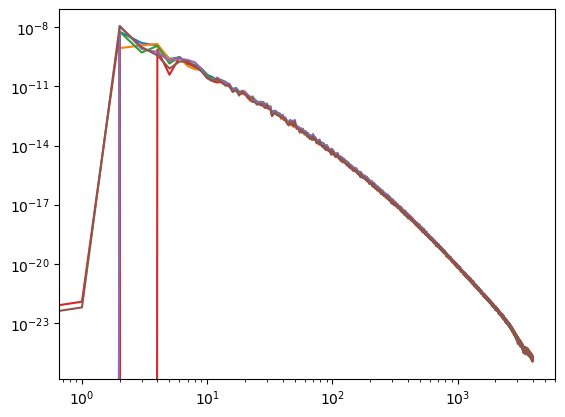

In [26]:
for k, c in crosses_dict.items():
    for c_ in c:
        plt.loglog(c_)

## Check Normalization

### N0 contribution

In [27]:
from plancklens import n0s
#checking theory dependence on noise and beam
n0iter = n0s.get_N0_iter(qe_key = qe_key, nlev_t = nlev_t, nlev_p = nlev_p, beam_fwhm = beam_fwhm, 
                    cls_unl_fid = cls_unl_fid, lmin_cmb = lmin_cmb, lmax_cmb = lmax_cmb, itermax = max(iters), lmax_qlm = lmax_qlm, ret_delcls = True)

 [00:00:04]  -----> 50%


In [28]:
N0sb, N0sunb, Resp, cls_plen, cls_plen_true, _  = n0iter

In [29]:
from plancklens import qresp
from lenscarf.utils_hp import gauss_beam
from lenscarf.utils import cli


transf_tlm   =  gauss_beam(SO.beam/180 / 60 * np.pi, lmax=SO.lmax_ivf) * (np.arange(SO.lmax_ivf + 1) >= lmin_cmb)
ftl =  cli(cls_len['tt'][:SO.lmax_ivf + 1] + (nlev_t / 180 / 60 * np.pi) ** 2 * cli(transf_tlm ** 2)) * (transf_tlm > 0)

ftlu =  cli(cls_unl['tt'][:SO.lmax_ivf + 1] + (nlev_t / 180 / 60 * np.pi) ** 2 * cli(transf_tlm ** 2)) * (transf_tlm > 0)

R = qresp.get_response('ptt', lmax_cmb, 'p', SO.cls_len, SO.cls_weight, {'e': ftl*0., 'b': ftl*0., 't': ftl}, lmax_qlm=SO.lmax_qlm)[0]

In [30]:
clppfid = cls_unl['pp'][0:len(auto_in_temp)]

/tmp/ipykernel_76125/3565291942.py:5: RuntimeWarning: divide by zero encountered in divide
  n0calculated = 1/R if itr == 0 else n0calculated
/tmp/ipykernel_76125/3565291942.py:8: RuntimeWarning: invalid value encountered in divide
  WL = clppfid/(clppfid+n0calculated+n1calculated)


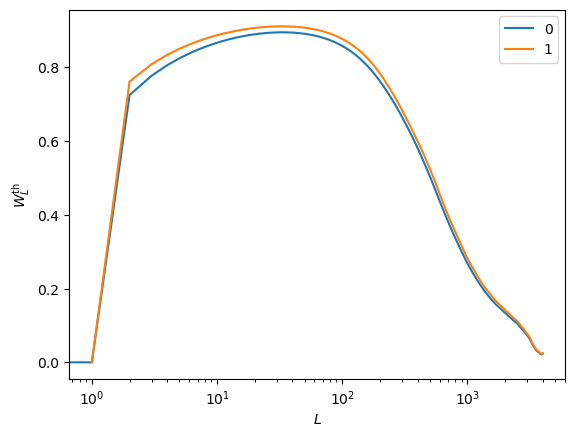

In [31]:
p = None
wfs_th = {}
for itr in iters:
    n0calculated = n0iter[0][itr]
    n0calculated = 1/R if itr == 0 else n0calculated
    #n1calculated = n0iter[0][0]**2.*n1_tt if itr == 0 else 0
    n1calculated = 0
    WL = clppfid/(clppfid+n0calculated+n1calculated)
    #color = None if p is None else p[0].get_color()
    p = plt.plot(WL, label = f'{itr}')
    wfs_th[itr] = WL
plt.xlabel(r'$L$')
plt.ylabel(r'$W^{\rm{th}}_L$')
plt.xscale('log')
plt.legend(loc = 'best')

In [32]:
from plancklens.n1 import n1 as n1s

In [33]:
N0s, N0s_unbiased, Response, delcls_fid, delcls_true, fals = n0iter

In [33]:
lib_dir = '/pscratch/sd/o/omard/n1TTiterativeGiulioS4Paper'

n1_tts_dict = {}

n1_tts = []
n1_tts_extra = []
itermax = max(iters)+1
key = 'ptt'

for i in range(itermax):
    lib_dir_ = lib_dir+f"{i}"
    n1lib = n1s.library_n1(lib_dir_, delcls_fid[i]['tt'], delcls_fid[i]['te'], delcls_fid[i]['ee'], SO.lmax_qlm,  dL = 10, lps = None)
    ftl = fals[i]['tt']
    fel = fals[i]['tt']
    fbl = fals[i]['tt']
    #ppres = 1/(1/Response[i]+1/pp)
    n1_tt, n1_tt_extra = n1lib.get_n1(key, 'p', delcls_fid[i]['pp'], ftl, fel, fbl, SO.lmax_qlm)
    n1_tts += [n1_tt]



In [34]:
n1_tts = [0, 0]

In [35]:
Lmax = SO.lmax_qlm
Ls = np.arange(1, Lmax + 1)

/tmp/ipykernel_76125/2122714285.py:5: RuntimeWarning: divide by zero encountered in divide
  n0calculated = 1/R if itr == 0 else n0calculated
/tmp/ipykernel_76125/2122714285.py:8: RuntimeWarning: divide by zero encountered in divide
  n1calculated = 1/Response[itr]**2.*n1_tts[itr]
/tmp/ipykernel_76125/2122714285.py:8: RuntimeWarning: invalid value encountered in multiply
  n1calculated = 1/Response[itr]**2.*n1_tts[itr]
/tmp/ipykernel_76125/2122714285.py:12: RuntimeWarning: invalid value encountered in divide
  WL2 = clppfid/(clppfid+n0calculated)


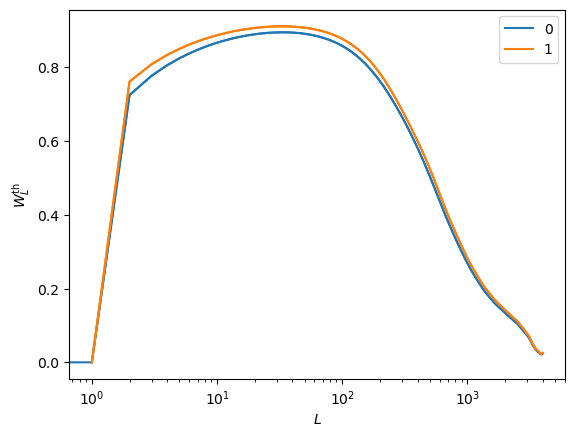

In [36]:
p = None
wfs_th = {}
for itr in iters:
    n0calculated = n0iter[0][itr]
    n0calculated = 1/R if itr == 0 else n0calculated
    
    #n1calculated = 1/Response[itr]**2.*n1_tts[iters.index(itr)]
    n1calculated = 1/Response[itr]**2.*n1_tts[itr]

    WL = clppfid/(clppfid+n0calculated+n1calculated)

    WL2 = clppfid/(clppfid+n0calculated)

    #color = None if p is None else p[0].get_color()
    p = plt.plot(WL, label = f'{itr}')
    plt.plot(WL2, color = p[0].get_color())
    wfs_th[itr] = WL
plt.xlabel(r'$L$')
plt.ylabel(r'$W^{\rm{th}}_L$')
plt.xscale('log')
plt.legend(loc = 'best')

/tmp/ipykernel_76125/2867874994.py:5: RuntimeWarning: divide by zero encountered in divide
  n0calculated = 1/R if itr == 0 else n0calculated
/tmp/ipykernel_76125/2867874994.py:8: RuntimeWarning: divide by zero encountered in divide
  n1calculated = 1/Response[itr]**2.*n1_tts[itr]
/tmp/ipykernel_76125/2867874994.py:8: RuntimeWarning: invalid value encountered in multiply
  n1calculated = 1/Response[itr]**2.*n1_tts[itr]
/tmp/ipykernel_76125/2867874994.py:15: RuntimeWarning: invalid value encountered in divide
  plt.plot(WL2/WL-1, label = f'{itr}')
/tmp/ipykernel_76125/2867874994.py:12: RuntimeWarning: invalid value encountered in divide
  WL2 = clppfid/(clppfid+n0calculated)


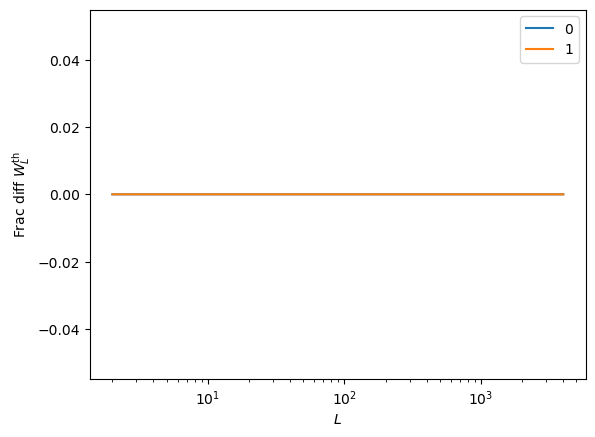

In [37]:
p = None
wfs_th = {}
for itr in iters:
    n0calculated = n0iter[0][itr]
    n0calculated = 1/R if itr == 0 else n0calculated
    
    #n1calculated = 1/Response[itr]**2.*n1_tts[iters.index(itr)]
    n1calculated = 1/Response[itr]**2.*n1_tts[itr]

    WL = clppfid/(clppfid+n0calculated+n1calculated)

    WL2 = clppfid/(clppfid+n0calculated)

    #color = None if p is None else p[0].get_color()
    plt.plot(WL2/WL-1, label = f'{itr}')
    wfs_th[itr] = WL
plt.xlabel(r'$L$')
plt.ylabel(r'Frac diff $W^{\rm{th}}_L$')
plt.xscale('log')
plt.legend(loc = 'best')

In [37]:
n1calculated = n0iter[0][0]**2.*n1_tts[iters.index(itr)]

## Getting sims based normalization from Gaussian simulations

In [38]:
Nsims = 1

plms_born_gaussian = {k: statics.rec.load_plms(f'{SOBg.TEMP}/ptt_sim{k:04}{version}', iters) for k in range(Nsims)}


input_plm_maps_born_gaussian = {k: SOBg.sims_cmb_len.get_sim_plm(k) for k in range(Nsims)}

plm_in_ins_born_gaussian = {k: palm_copy(d, lmax = SOBg.lmax_phi) for k, d in input_plm_maps_born_gaussian.items()} #GF input postborn + NL map

auto_in_born_gaussian = {k: hp.alm2cl(plm_in) for k, plm_in in plm_in_ins_born_gaussian.items()}

crosses_born_gaussian = {k: [hp.alm2cl(plm_in, plm_rec) for plm_rec in plms_born_gaussian[k]] for k, plm_in in plm_in_ins_born_gaussian.items()}

print(auto_in_born_gaussian.keys())

dict_keys([0])


/tmp/ipykernel_197850/2264271371.py:5: RuntimeWarning: invalid value encountered in divide
  somma = np.nanmean([crosses_born_gaussian[i][itr]/auto_in_born_gaussian[i] for i in range(Nsims)], axis = 0)
/tmp/ipykernel_197850/2264271371.py:5: RuntimeWarning: Mean of empty slice
  somma = np.nanmean([crosses_born_gaussian[i][itr]/auto_in_born_gaussian[i] for i in range(Nsims)], axis = 0)


Text(0.5, 1.0, 'Empirical sims normalization for Gaussian simulations from kappa Born power')

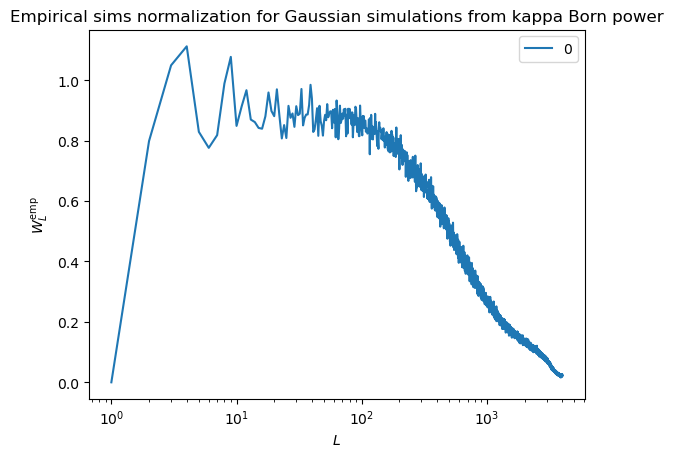

In [39]:
norms_gauss_born_gaussian = {}

#always assume in this notebook that you have all iterations from 0 to itmax in iters
for itr in iters:
    somma = np.nanmean([crosses_born_gaussian[i][itr]/auto_in_born_gaussian[i] for i in range(Nsims)], axis = 0)
    norms_gauss_born_gaussian[itr] = somma
    plt.plot(somma, label = itr)
plt.legend()
plt.xscale('log')
plt.ylabel(r'$W_L^{\rm{emp}}$')
plt.xlabel('$L$')
plt.title('Empirical sims normalization for Gaussian simulations from kappa Born power')

/tmp/ipykernel_76125/2249870696.py:5: RuntimeWarning: invalid value encountered in divide
  somma = np.nanmean([crosses_born_gaussian[i][itr]/auto_in_born_gaussian[i] for i in range(Nsims)], axis = 0)
/tmp/ipykernel_76125/2249870696.py:5: RuntimeWarning: Mean of empty slice
  somma = np.nanmean([crosses_born_gaussian[i][itr]/auto_in_born_gaussian[i] for i in range(Nsims)], axis = 0)


Text(0.5, 1.0, 'Comparing empirical sims normalization for Gaussian simulations from kappa Born power and theoretical expected one')

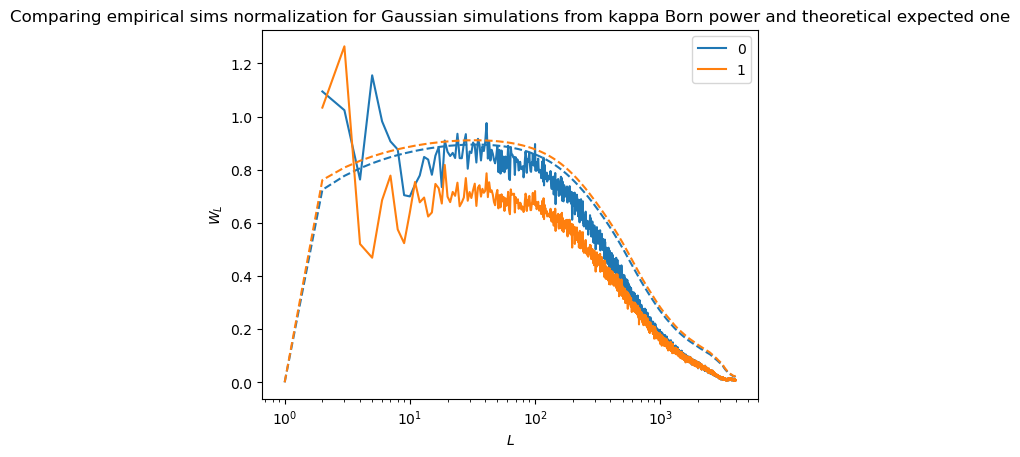

In [39]:
norms_gauss_born_gaussian = {}

#always assume in this notebook that you have all iterations from 0 to itmax in iters
for itr in iters:
    somma = np.nanmean([crosses_born_gaussian[i][itr]/auto_in_born_gaussian[i] for i in range(Nsims)], axis = 0)
    somma[:2] = np.nan
    norms_gauss_born_gaussian[itr] = somma
    p = plt.plot(somma, label = itr)
    plt.plot(wfs_th[itr], ls = '--', color = p[0].get_color())
plt.legend()
plt.xscale('log')
plt.ylabel(r'$W_L$')
plt.xlabel('$L$')
plt.title('Comparing empirical sims normalization for Gaussian simulations from kappa Born power and theoretical expected one')

## Correcting with empirical Gaussian kappa power Born derived normalization

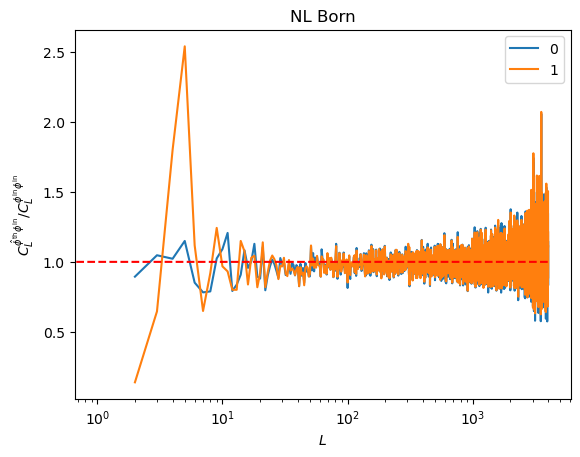

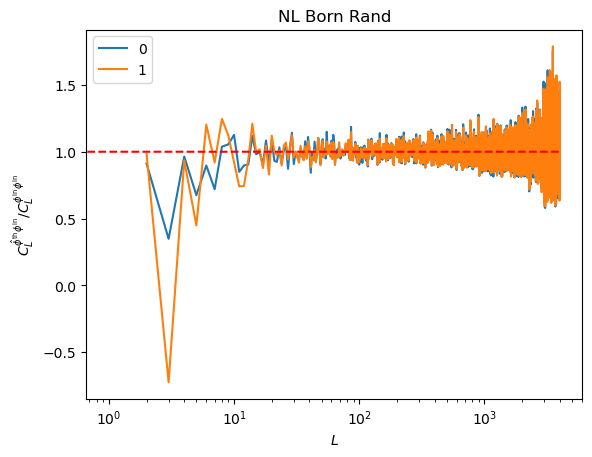

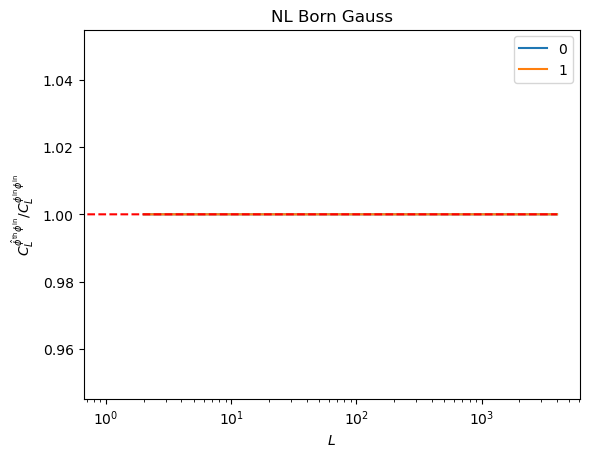

In [40]:
for k, cross_ in crosses_dict.items():
    autoin_ = autos_in_dict[k]
    plt.title(f"{k}")
    for it, cross_element in enumerate(cross_):
        plt.plot(cross_element/norms_gauss_born_gaussian[it]/autoin_, label = it)
    plt.plot(np.arange(0, 4000), np.ones(4000), 'r--')
    plt.xlabel(r'$L$')
    plt.ylabel(r'$C^{\hat{\phi}^{\rm{th}}\phi^{\rm{in}}}_L/C^{\phi^{\rm{in}}\phi^{\rm{in}}}_L$')
    plt.xscale('log')
    plt.legend()
    plt.show()

In [42]:
from scipy import signal
import scipy

def bin_theory(l, lcl, bin_edges):
    sums = scipy.stats.binned_statistic(l, l, statistic = 'sum', bins = bin_edges)
    cl = scipy.stats.binned_statistic(l, lcl, statistic = 'sum', bins = bin_edges)
    cl = cl[0]/sums[0]
    return cl

bin_edges = np.arange(10, 4000, 50)

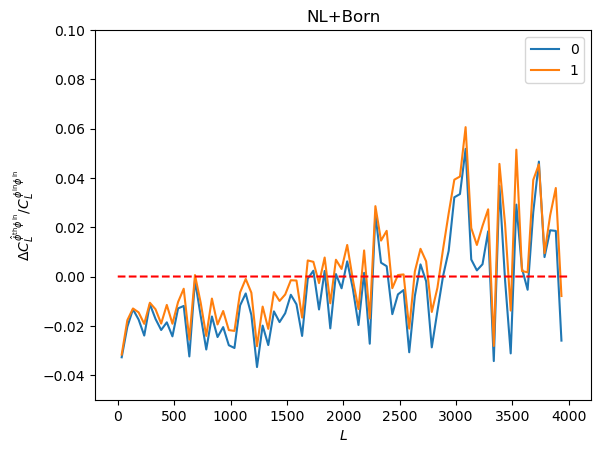

In [43]:


autoin_ = autos_in_dict[keyB]
plt.title(f"NL+Born")

cross_A = crosses_dict[keyB]
cross_B = crosses_dict[keyBr]

for it, cross_elements in enumerate(zip(cross_A, cross_B)):
    A, B = cross_elements
    ls_ = np.arange(0, len(A))
    elbin = ls_
    process = lambda x: signal.savgol_filter(x, 53, # window size used for filtering
                           3) 
    #process = lambda x: x
    process = lambda x: bin_theory(ls_, ls_*x, bin_edges)
    elbin = (bin_edges[:-1]+bin_edges[1:])/2
    
    value = process((A-B)/norms_gauss_born_gaussian[it]/autoin_) 
    plt.plot(elbin, value, label = it)
    
plt.plot(np.arange(0, 4000), np.zeros(4000), 'r--')
plt.xlabel(r'$L$')
plt.ylabel(r'$\Delta C^{\hat{\phi}^{\rm{th}}\phi^{\rm{in}}}_L/C^{\phi^{\rm{in}}\phi^{\rm{in}}}_L$')
#plt.xscale('log')
plt.ylim(-0.05, 0.1)
plt.legend()
plt.show()

In [45]:


autoin_ = autos_in_dict[keyPB]
plt.title(f"NL+PostBorn")

cross_A = crosses_dict[keyPB]
cross_B = crosses_dict[keyPBr]

for it, cross_elements in enumerate(zip(cross_A, cross_B)):
    A, B = cross_elements
    process = lambda x: signal.savgol_filter(x, 53, # window size used for filtering
                           3) 
    process = lambda x: x
    value = process((A-B)/norms_gauss_born_gaussian[it]/autoin_) 
    plt.plot(value, label = it)
    
plt.plot(np.arange(0, 4000), np.zeros(4000), 'r--')
plt.xlabel(r'$L$')
plt.ylabel(r'$\Delta C^{\hat{\phi}^{\rm{th}}\phi^{\rm{in}}}_L/C^{\phi^{\rm{in}}\phi^{\rm{in}}}_L$')
plt.xscale('log')
plt.ylim(-0.1, 0.1)
plt.legend()
plt.show()

KeyError: 'NL Post-Born'

## Using theoretical normalization

/tmp/ipykernel_128084/3532524075.py:5: RuntimeWarning: invalid value encountered in divide
  plt.plot(cross_element/wfs_th[it]/autoin_, label = it)
/tmp/ipykernel_128084/3532524075.py:5: RuntimeWarning: divide by zero encountered in divide
  plt.plot(cross_element/wfs_th[it]/autoin_, label = it)


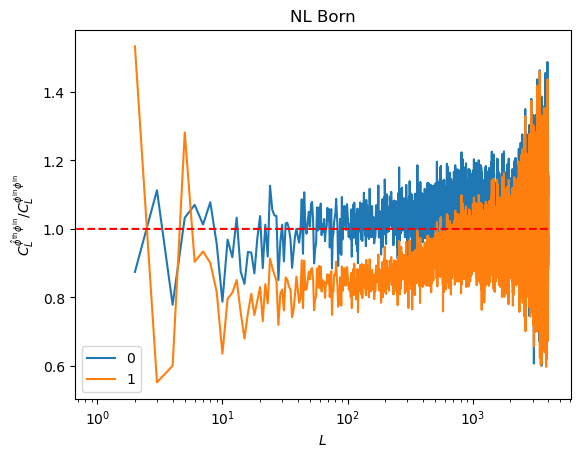

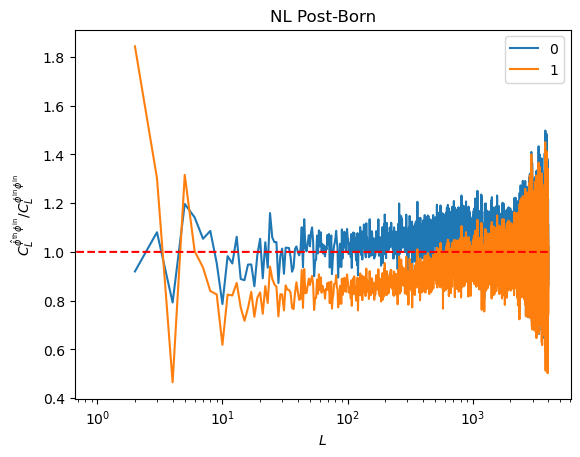

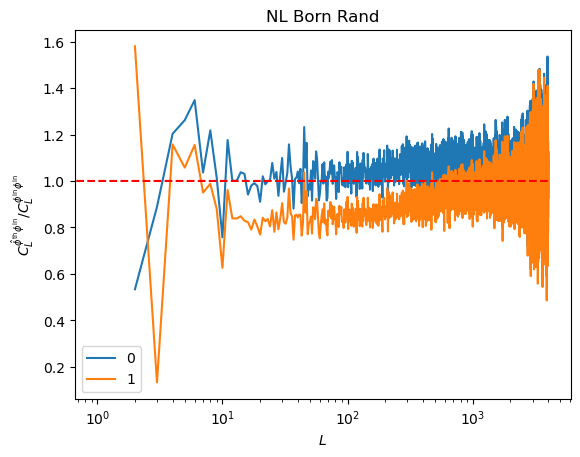

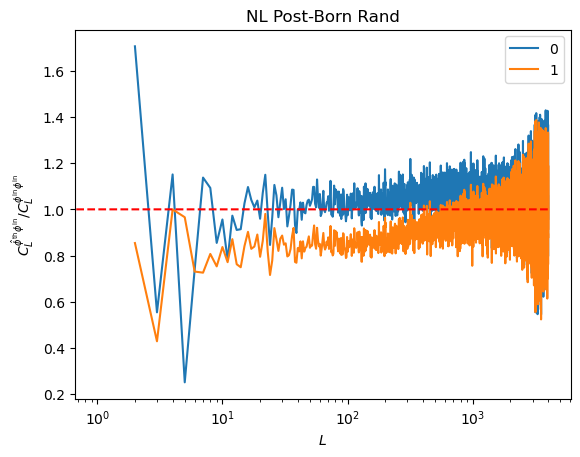

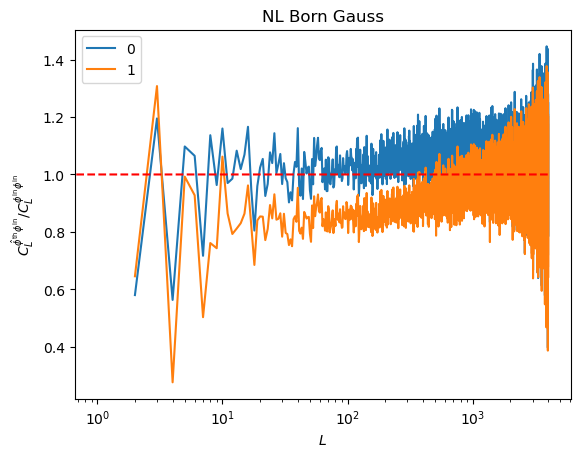

In [90]:
for k, cross_ in crosses_dict.items():
    autoin_ = autos_in_dict[k]
    plt.title(f"{k}")
    for it, cross_element in enumerate(cross_):
        plt.plot(cross_element/wfs_th[it]/autoin_, label = it)
    plt.plot(np.arange(0, 4000), np.ones(4000), 'r--')
    plt.xlabel(r'$L$')
    plt.ylabel(r'$C^{\hat{\phi}^{\rm{th}}\phi^{\rm{in}}}_L/C^{\phi^{\rm{in}}\phi^{\rm{in}}}_L$')
    plt.xscale('log')
    plt.legend()
    plt.show()